In [2]:
pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.2 MB/s eta 0:00:000:00:010:00:01:010m
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from torch.utils.data import DataLoader 
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE 
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms

In [7]:
Fashion_mnist_test_transform = transforms.Compose([transforms.ToTensor()]) 
testset_Fashion_mnist = datasets.FashionMNIST(root='./data', train=False, download=True,transform=Fashion_mnist_test_transform)
FM_test = DataLoader(testset_Fashion_mnist, batch_size=32, shuffle=False, num_workers=2)
FM_test_images = [] 
FM_test_labels = []

for batch in FM_test:
    images, labels = batch
    images_flat = images.view(images.shape[0], -1) 
    FM_test_images.append(images_flat.numpy()) 
    FM_test_labels.append(labels.numpy())
FM_test_images = np.vstack(FM_test_images) 
FM_test_labels = np.concatenate(FM_test_labels)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:
X_=pd.DataFrame(data=FM_test_images) #test_data
y_=pd.Series(data=FM_test_labels) #test_label

In [65]:
X_.loc[:,0:1]

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,0.0,0.0


## PCA for dimension reduction

In [68]:
# dimension = 100
pca=PCA(n_components =100)
test_PCA=pca.fit_transform(X_)
test_PCA=pd.DataFrame(data=test_PCA)

In [69]:
test_PCA

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-5.866658,2.510755,1.076371,0.303398,0.071597,-0.406285,-1.074828,1.015537,-1.794531,-0.687294,...,0.000624,-0.328979,-0.124460,0.095709,-0.209326,0.233612,0.221409,-0.080295,-0.026830,0.057289
1,7.313808,4.227878,-2.950557,-0.130705,-1.799002,-0.569775,0.096768,-1.866129,-1.150173,-2.186694,...,0.281888,0.110527,0.158587,-0.146951,-0.013737,0.234772,-0.099016,-0.098785,0.143065,-0.393843
2,1.524644,-6.009387,1.873432,-1.896355,-1.700253,-1.576578,1.231989,0.813138,-2.038706,2.468123,...,-0.236077,0.255020,0.207740,-0.013814,0.096086,0.078344,-0.065689,0.218124,0.042494,-0.173575
3,-1.320219,-5.977969,0.784781,-0.129318,-1.960535,-1.804263,1.203252,0.613043,-1.025019,0.835286,...,-0.061563,0.287996,0.162862,0.134535,-0.114285,-0.008230,0.344676,0.189898,-0.163261,0.086943
4,1.049394,0.398215,-1.289853,1.200856,-0.567247,1.611887,0.258923,-0.487995,-1.224808,-0.505181,...,0.148321,-0.122203,-0.072843,0.229327,0.000341,-0.011457,-0.183386,-0.011541,-0.130145,0.039290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.350966,5.192397,4.070982,1.512147,-1.733067,-0.215973,-1.954750,1.330997,-0.387026,-0.550758,...,0.037062,0.038308,-0.003940,0.306625,0.016373,0.639961,0.035712,-0.023589,-0.324872,-0.159384
9996,-3.619201,-5.012153,-0.570387,0.333252,-1.466087,-0.998421,0.674675,0.671338,-0.448273,-0.013022,...,0.041208,-0.012980,-0.292709,-0.287591,-0.072883,0.036970,0.005760,-0.226507,0.107632,-0.488701
9997,-1.982832,-2.891124,0.592198,3.489985,4.250102,-0.114463,-0.570135,1.597524,-0.873325,-1.134874,...,-0.105250,0.098805,0.358994,-0.139038,0.159418,-0.005710,-0.212266,-0.317132,-0.143134,-0.145518
9998,-0.847615,-5.567508,1.819839,-1.159465,-1.793323,-2.080400,1.191728,0.046042,0.907491,-0.796609,...,0.118138,-0.588262,-0.058186,-0.257365,0.026692,0.039095,-0.384953,-0.660076,-0.156190,-0.580063


In [ ]:
testDF = pd.DataFrame(data=test_PCA.loc[:,0:1],index=test_PCA.index)
testDF100 = pd.concat((testDF,y_),axis=1,join="inner")
testDF100.columns =["x-axis","y-axis","Label"]
sns.lmplot(x="x-axis",y="y-axis",hue="Label",data=testDF100,fit_reg=False,height=8)
plt.grid()

In [71]:
# dimension = 50
pca=PCA(n_components =50)
test_PCA=pca.fit_transform(X_)
test_PCA=pd.DataFrame(data=test_PCA)

In [ ]:
testDF = pd.DataFrame(data=test_PCA.loc[:,0:1],index=test_PCA.index)
testDF50 = pd.concat((testDF,y_),axis=1,join="inner")
testDF50.columns =["x-axis","y-axis","Label"]
sns.lmplot(x="x-axis",y="y-axis",hue="Label",data=testDF50,fit_reg=False,height=8)
plt.grid()

In [73]:
# dimension = 10
pca=PCA(n_components =10)
test_PCA=pca.fit_transform(X_)
test_PCA=pd.DataFrame(data=test_PCA)

In [ ]:
testDF = pd.DataFrame(data=test_PCA.loc[:,0:1],index=test_PCA.index)
testDF10 = pd.concat((testDF,y_),axis=1,join="inner")
testDF10.columns =["x-axis","y-axis","Label"]
sns.lmplot(x="x-axis",y="y-axis",hue="Label",data=testDF10,fit_reg=False,height=8)
plt.grid()

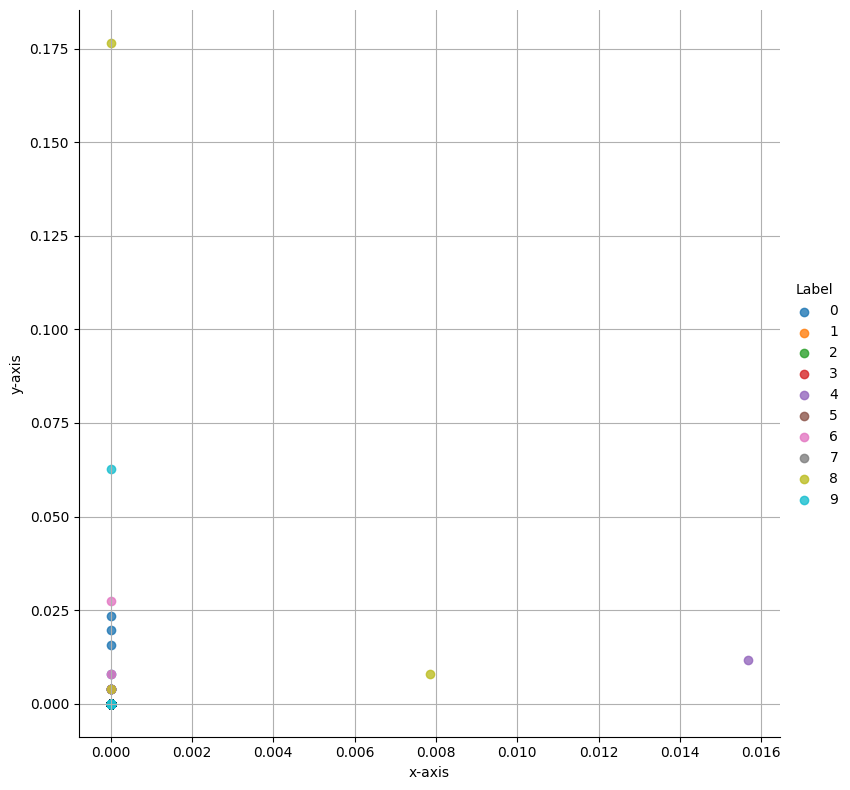

In [76]:
# dimension = 784
testDF = pd.DataFrame(data=X_.loc[:,0:1],index=X_.index)
testDF784 = pd.concat((testDF,y_),axis=1,join="inner")
testDF784.columns =["x-axis","y-axis","Label"]
sns.lmplot(x="x-axis",y="y-axis",hue="Label",data=testDF784,fit_reg=False,height=8)
plt.grid()

## t-SNE for visualization

In [57]:
n_components =2
learning_rate =300
perplexity =30
early_exaggeration =12
init = "random"

tSNE=TSNE(n_components=n_components,learning_rate=learning_rate, perplexity=perplexity,early_exaggeration=early_exaggeration,init=init)

In [37]:
X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner") 
testDF.columns = ["x-axis", "y-axis", "Label"]

In [41]:
testDF

,x-axis,y-axis,Label
0,-5.866729,2.510908,9
1,7.313842,4.227843,2
2,1.524638,-6.009365,1
3,-1.320236,-5.977948,1
4,1.049400,0.398211,6
...,...,...,...
9995,-2.350964,5.192382,9
9996,-3.619226,-5.012134,1
9997,-1.982847,-2.891112,8
9998,-0.847629,-5.567487,1


In [39]:
################## This part should include K-means algorithm ###################
##########################################################################


In [ ]:
testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8) 
plt.title("Clustering Result")
plt.grid()